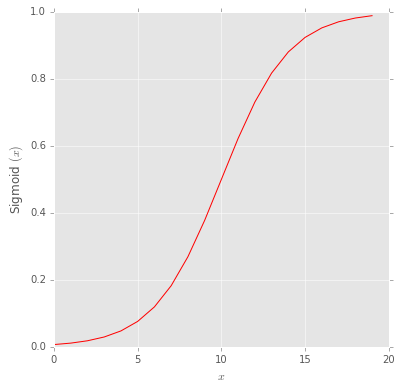

In [88]:
# Plot Sigmoid Function
# The logistic function looks like an elongated S
# Also consider generalised logistic function 

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

matplotlib.style.use('ggplot')

####################
# Input Values Here:
scale = 2
offset = 10
flip = 0                     # Flip = 1 to reverse curve
###################

# Define the Sigmoid Function
def sigmoid(t):                         
    return (1/(1 + np.e**(-t))) 

plot_range = np.arange(-5, 5, 0.5) 
y_values = sigmoid(plot_range)

# Plot curve
plt.figure(figsize=(6,6))
if flip == 0:
    plt.plot((plot_range*scale)+offset, y_values, color="red")
else:
    plt.plot((plot_range*scale)+offset, 1-y_values, color="red")

plt.xlabel('$x$')
plt.ylabel('Sigmoid $(x)$')


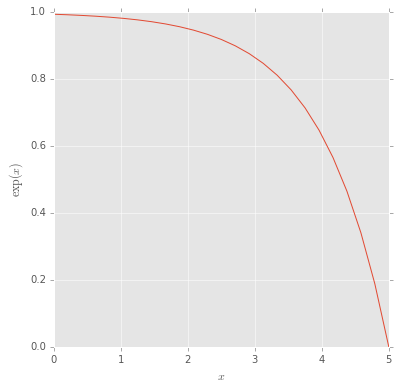

In [92]:
# Plot Exponential Function

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

####################
# Input Values Here:
offset = 0
flip = 1                     # Flip = 1 to reverse curve
###################

# Define the Exponential Function
x = np.linspace(-5, 0, 25)
y = np.exp(x) 

# Plot curve
plt.figure(figsize=(6,6))
if flip == 0:
    plt.plot(x + 5 + offset, y)
else:
    plt.plot(x + 5 + offset, 1-y)        
    
plt.xlabel('$x$')
plt.ylabel('$\exp(x)$')
plt.show()

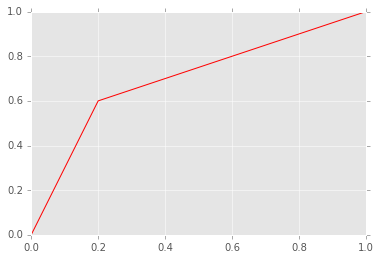

In [47]:
# Plot Piecewise Linear Function

import numpy
#import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

####################
# Input Coordinates here:
x1 = 0
y1 = 0

x2 = .2 
y2 = .6

x3 = 1 
y3 = 1
###################

plt.plot([x1,x2,x3], [y1,y2,y3], 'r-')

plt.show()
